# Heart disease prediction using Logistic_Regression

In [2]:
import pandas as pd
data= pd.read_csv("C:\\Users\\User\\Desktop\\dataset\\heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.shape

(303, 14)

In [4]:
data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

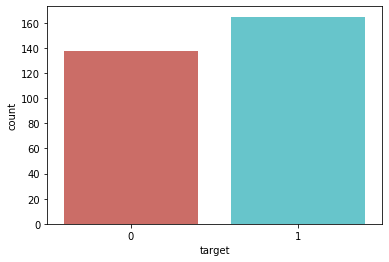

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='target', data=data, palette='hls')
plt.show()

# split data into independent and target variable

In [6]:
x=pd.DataFrame(data.iloc[:,:-1])

In [7]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [8]:
y=pd.DataFrame(data.iloc[:,-1])

In [9]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


# Split data into train and test

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.20, random_state=1)

In [13]:
print(x_train.shape)

(242, 13)


# Create and Train Model

In [15]:
#import model fitting
from sklearn.linear_model import LogisticRegression

#create instance of logistic regression
logmodel=LogisticRegression()
logmodel.fit(x_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting test set result

In [16]:
y_pred=logmodel.predict(x_test)
print(y_pred)

[0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0
 0 1 0 1 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1]


# Calculating Accuracy

In [18]:
print("Accuracy ", (logmodel.score(x_train, y_train)))

Accuracy  0.8636363636363636


# Evaluate model using Confusion Matrix

In [20]:
from sklearn.metrics import confusion_matrix
confusion_metrics= confusion_matrix(y_test, y_pred)
print(confusion_metrics)

[[20 10]
 [ 4 27]]


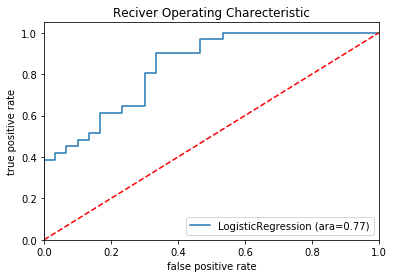

In [25]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc= roc_auc_score(y_test, logmodel.predict(x_test))
fpr,tpr, thresholds=roc_curve(y_test, logmodel.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr,tpr, label='LogisticRegression (ara=%0.2f)' %logit_roc_auc)
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Reciver Operating Charecteristic')
plt.legend(loc="lower right")
plt.savefig("Roc_curve")
plt.show()
